## Random walks in 3D and 4D

In [28]:
function samples_3DRW(nsamples::Int64=10, nsteps::Int64=10)
    """ Generate sample random walks in 3D
    nsamples = number of samples
    nsteps = step length of each random walk
    """
    x2av, y2av, z2av = 0.0, 0.0, 0.0
    Random.seed!(3)
    ran_vec = rand(nsamples*nsteps)
    for i ∈ 1:nsamples
        xi, yi, zi = 0.0, 0.0, 0.0
        for j ∈ 1:nsteps
            rn::Int64 = ceil(6*ran_vec[nsteps*(i-1)+j])
            if rn == 1
                xi += 1.0
            elseif rn == 2
                xi -= 1.0
            elseif rn == 3
                yi += 1.0
            elseif rn == 4
                yi -= 1.0
            elseif rn == 5
                zi += 1.0
            else
                zi -= 1.0
            end
        end
        xsq, ysq, zsq = xi^2, yi^2, zi^2
        x2av += xsq
        y2av += ysq
        z2av += zsq
    end
    x2av /= nsamples
    y2av /= nsamples
    z2av /= nsamples
    return x2av, y2av, z2av
end;

In [29]:
nsamples = 1000
nsteps_vec = 0:5:2700
x2av_vec = [0.0 for i in nsteps_vec]
y2av_vec = [0.0 for i in nsteps_vec]
z2av_vec = [0.0 for i in nsteps_vec]
for (i,nsteps) in enumerate(nsteps_vec)
    x2av_vec[i], y2av_vec[i], z2av_vec[i] = samples_3DRW(nsamples, nsteps)
end

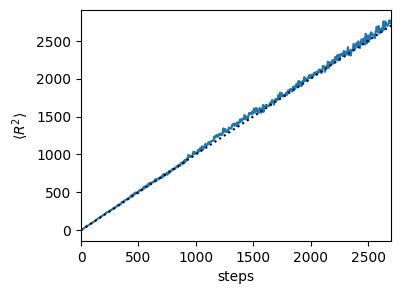

PyObject Text(30.599999999999994, 0.5, '$\\langle R^2\\rangle$')

In [30]:
PyPlot.rc("figure", figsize = (4, 3))
plot(nsteps_vec, x2av_vec .+ y2av_vec .+ z2av_vec)
plot(nsteps_vec, [s for s in nsteps_vec], linestyle=":", color="k")
plt.xlim(first(nsteps_vec), last(nsteps_vec))
plt.xlabel("steps")
plt.ylabel(L"$\langle R^2\rangle$")

In [31]:
function samples_4DRW(nsamples::Int64=10, nsteps::Int64=10)
    """ Generate sample random walks in 4D
    nsamples = number of samples
    nsteps = step length of each random walk
    """
    w2av, x2av, y2av, z2av = 0.0, 0.0, 0.0, 0.0
    Random.seed!(3)
    ran_vec = rand(nsamples*nsteps)
    for i ∈ 1:nsamples
        wi, xi, yi, zi = 0.0, 0.0, 0.0, 0.0
        for j ∈ 1:nsteps
            rn::Int64 = ceil(2*4*ran_vec[nsteps*(i-1)+j])
            if rn == 1
                wi += 1.0
            elseif rn == 2
                wi -= 1.0
            elseif rn == 3
                xi += 1.0
            elseif rn == 4
                xi -= 1.0
            elseif rn == 5
                yi += 1.0
            elseif rn == 6
                yi -= 1.0
            elseif rn == 7
                zi += 1.0
            else
                zi -= 1.0
            end
        end
        wsq, xsq, ysq, zsq = wi^2, xi^2, yi^2, zi^2
        w2av += wsq
        x2av += xsq
        y2av += ysq
        z2av += zsq
    end
    w2av /= nsamples
    x2av /= nsamples
    y2av /= nsamples
    z2av /= nsamples
    return w2av, x2av, y2av, z2av
end;

In [32]:
nsamples = 1000
nsteps_vec = 0:5:2700
w2av_vec = [0.0 for i in nsteps_vec]
x2av_vec = [0.0 for i in nsteps_vec]
y2av_vec = [0.0 for i in nsteps_vec]
z2av_vec = [0.0 for i in nsteps_vec]
for (i,nsteps) in enumerate(nsteps_vec)
    w2av_vec[i], x2av_vec[i], y2av_vec[i], z2av_vec[i] = samples_4DRW(nsamples, nsteps)
end

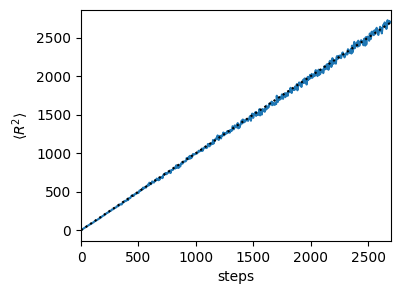

PyObject Text(30.599999999999994, 0.5, '$\\langle R^2\\rangle$')

In [33]:
PyPlot.rc("figure", figsize = (4, 3))
plot(nsteps_vec, w2av_vec .+ x2av_vec .+ y2av_vec .+ z2av_vec)
plot(nsteps_vec, [s for s in nsteps_vec], linestyle=":", color="k")
plt.xlim(first(nsteps_vec), last(nsteps_vec))
plt.xlabel("steps")
plt.ylabel(L"$\langle R^2\rangle$")